In [2]:


import numpy as np 
import pandas as pd 
import os
print(os.listdir('/kaggle/input'))


['leapgestrecog', 'hagrid-classification-512p', 'hagrid-classification-512p-no-gesture']


In [4]:
root = '/kaggle/input/'
dataset_name = 'hagrid-classification-512p/'
print(os.listdir(root+dataset_name+dataset_name))


['call', 'four', 'mute', 'ok', 'rock', 'dislike', 'two_up', 'three2', 'three', 'one', 'two_up_inverted', 'stop', 'fist', 'palm', 'peace', 'peace_inverted', 'stop_inverted', 'like']


In [5]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

Using TensorFlow backend.


In [6]:
CATEGORIES = ["call", 'dislike','fist','four','like','mute','ok','one','palm','peace','peace_inverted','rock','stop','stop_inverted','three','three2','two_up','two_up_inverted']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/hagrid-classification-512p/hagrid-classification-512p"

## The Data

In [73]:
# Loading the images and their class(0 - 9)
image_data = []
labels = []
print("Completed importing:")
for dr in os.listdir(data_path):
    path = os.path.join(data_path, dr)
    for count, img in enumerate(os.listdir(path)):
        if count > 500:
            break
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))])
            labels.append(dr)
        except Exception as e:
            pass
    print("-- "+dr)


In [74]:
image_data = np.asarray(image_data)
labels = np.asarray(labels)
print(image_data.shape, labels.shape)

(9018, 1, 50, 50) (9018,)


In [75]:
image_data.shape = (-1, 50,50,1)
image_data.shape

(9018, 50, 50, 1)

In [76]:
# normalize
input_data = image_data/255

In [77]:
y = np.zeros(labels.shape)

for i in range(len(labels)):
    y[i] = CATEGORIES.index(labels[i])

y = y.astype('int')
random.sample(list(y),10)

[16, 3, 8, 0, 17, 1, 0, 15, 1, 11]

In [78]:


y = keras.utils.to_categorical(y,num_classes=18)

In [67]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_data, y, test_size = 0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=1)

# Building a model

In [62]:
# Import of keras model and hidden layers for our convolutional network
import keras
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [80]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(18, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [81]:
model.fit(X_train, Y_train, epochs = 7, batch_size=32, validation_data=(X_val, Y_val))

Train on 5771 samples, validate on 1443 samples
Epoch 1/7
5771/5771 [==============================] - 26s 5ms/step - loss: 2.8987 - accuracy: 0.0626 - val_loss: 2.8728 - val_accuracy: 0.0901
Epoch 2/7
5771/5771 [==============================] - 26s 4ms/step - loss: 2.7676 - accuracy: 0.1248 - val_loss: 2.6054 - val_accuracy: 0.1788
Epoch 3/7
5771/5771 [==============================] - 26s 5ms/step - loss: 2.4126 - accuracy: 0.2357 - val_loss: 2.4972 - val_accuracy: 0.2037
Epoch 4/7
5771/5771 [==============================] - 26s 5ms/step - loss: 2.1077 - accuracy: 0.3377 - val_loss: 2.3587 - val_accuracy: 0.2578
Epoch 5/7
5771/5771 [==============================] - 26s 4ms/step - loss: 1.8331 - accuracy: 0.4195 - val_loss: 2.4018 - val_accuracy: 0.2439
Epoch 6/7
5771/5771 [==============================] - 26s 5ms/step - loss: 1.5248 - accuracy: 0.5185 - val_loss: 2.4506 - val_accuracy: 0.2536
Epoch 7/7
5771/5771 [==============================] - 26s 5ms/step - loss: 1.1895 - acc

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 64)       

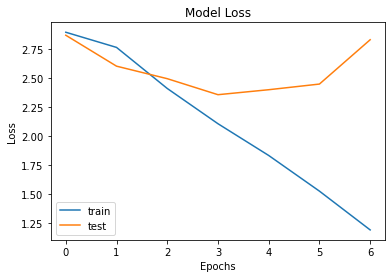

In [83]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

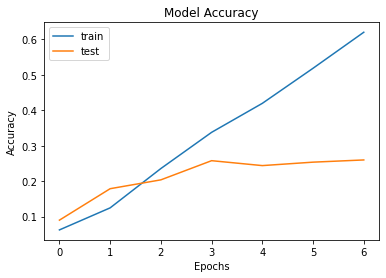

In [84]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [86]:

#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

1804/1804 [==============================] - 2s 845us/step
Test accuracy: 25.22%


[]

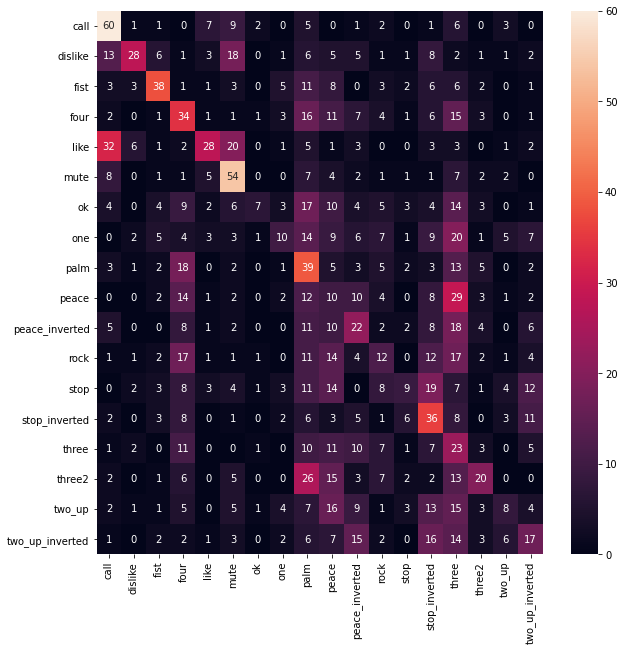

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()